<center>
    
# **Titanic Survival Analysis**

</center>

In [1]:
# import the important libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()
init_notebook_mode(connected = True)
%matplotlib inline

# scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# stats model
import statsmodels.api as sm

In [2]:
# read the dataset
titanic = pd.read_csv('titanic.csv')

In [3]:
# viewing the first 5 rows of data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# viewing the info of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## The Passengers on the Titanic (Age, Gender, Class, etc.)

D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 0.98, 'Each Passenger Class Given Sex')

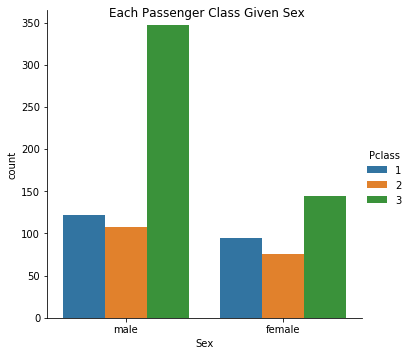

In [5]:
# visualizing bar chart of each passenger class given sex
sns.factorplot(
    x = 'Sex',                
    data = titanic,               
    hue = 'Pclass',                
    kind = 'count'
).fig.suptitle("Each Passenger Class Given Sex")

Text(0.5, 0.98, 'Each Sex Given Passenger Class')

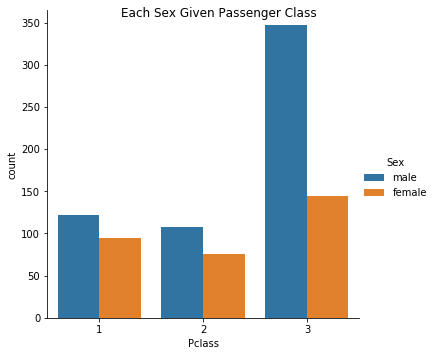

In [6]:
# visualizing bar chart of each sex given each passenger class
sns.factorplot(
    x = 'Pclass',                
    data = titanic,                
    hue = 'Sex',                
    kind = 'count'
).fig.suptitle("Each Sex Given Passenger Class")

- Male passengers are overall more than female passengers.
- More males and females are in the passenger class 3 than any other classes.
- Passenger class 2 has the lowest demand overall.

In [7]:
# to separate men, women, and children
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

Applying person category to find out the amount of people who are children and adult. Children are the ones who are younger than 16 years old.

In [8]:
# apply the function to the table
titanic['Person'] = titanic[['Age', 'Sex']].apply(male_female_child, axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Text(0.5, 0.98, 'Each Category of Person Given Passenger Class')

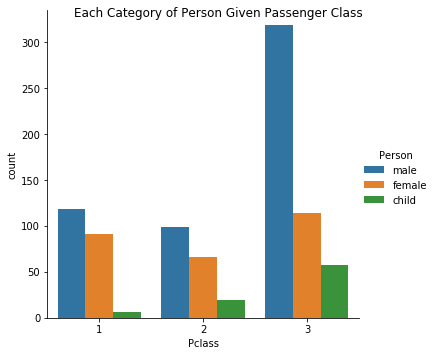

In [9]:
# visualizing male, women and children given passenger class
sns.factorplot(
    x = 'Pclass', 
    data = titanic, 
    hue = 'Person', 
    kind = 'count'
).fig.suptitle("Each Category of Person Given Passenger Class")

- Children category is derived from both males and females.
- More children in passenger class 3 than any other classes.

Text(0.5, 1.0, 'Age Distribution')

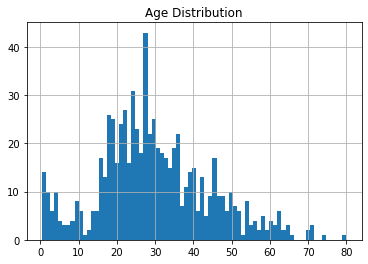

In [10]:
# visualizing age through histogram
titanic['Age'].hist(bins = 75)
plt.title("Age Distribution")

- Most of the passengers are ranging from 20 to 30 years old.
- A lot of children including babies and teenagers are onboard.

In [11]:
# mean of age
titanic['Age'].mean()

29.69911764705882

On average, the passengers' age is 29.7 years old.

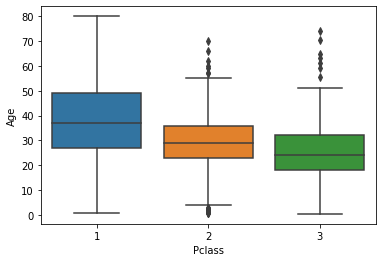

In [12]:
# boxplot of age
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

- There are more older people in passenger class 1.
- There are more younger people (children) in passenger class 3.

In [13]:
# count amount of people from each person category
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

There are 537 adult males, 271 adult females, and 83 children onboards.

Text(0.5, 1, 'Kernel Density Estimate of Both Sexes')

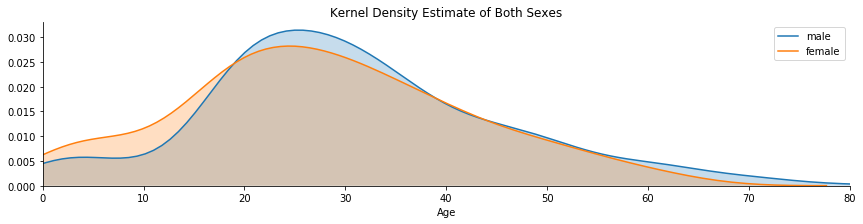

In [14]:
# visualizing kdeplot for sex side by side
fig = sns.FacetGrid(titanic, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of Both Sexes")

Before applying person category:
- More males who are ranging from 20 to 30 years old.
- A lot of children are females.
- A lot of elderly people are males.

Text(0.5, 1, 'Kernel Density Estimate of All Categories of Person')

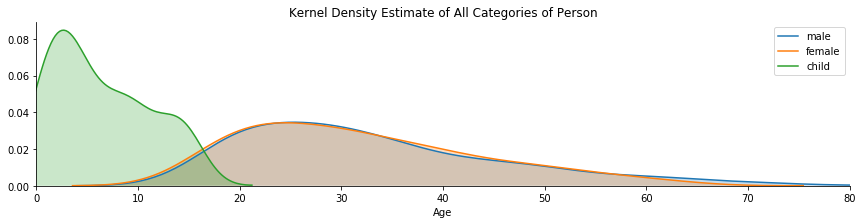

In [15]:
# visualizing kdeplot for person side by side
fig = sns.FacetGrid(titanic, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of All Categories of Person")

After applying person category:
- There are more or less the same amount of adult males and adult females onboard.
- There are a lot of chidren onboard, mostly babies and toddlers (0 to 5 years old).

Text(0.5, 1, 'Kernel Density Estimate of All Passenger Classes')

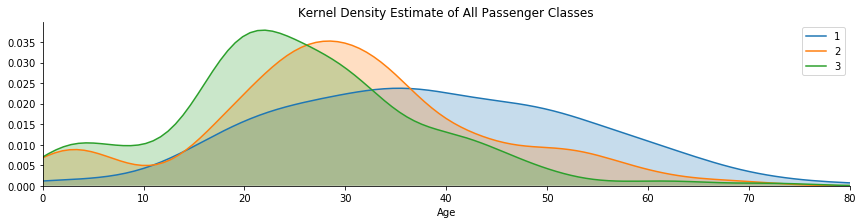

In [16]:
# visualizing kdeplot for passenger class side by side
fig = sns.FacetGrid(titanic,hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of All Passenger Classes")

- Most of the children are in passenger class 2 and 3.
- Over 35% of teenagers and young adults (16 to 25 years old) are in passenger class 3.
- At most 35% of people in passenger class 2 are adults with age ranging from 20 to 35 years old.
- Passenger class 1 has more elderly people than any other passenger classes.
- Passenger class 1 mostly consists of adults from 20 to 50 years old.

## Passengers' Deck, Fare and The Relations with the Class

In [17]:
# displaying fare distribution
titanic['Fare'].iplot(kind = 'hist', bins = 50)

- Most of the people pay less than GBP100 to board Titanic.
- The fee of boarding Titanic is at most GBP530 and 3 people pay for it.
- Less than 50 people pay GBP100 to GBP200 to board.

In [18]:
# drop NaN value from cabin column and input it into deck object
deck = titanic[['Cabin','Pclass', 'Fare']].dropna()

In [19]:
# preview of the deck object
deck.head()

,Cabin,Pclass,Fare
1,C85,1,71.2833
3,C123,1,53.1000
6,E46,1,51.8625
10,G6,3,16.7000
11,C103,1,26.5500


D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 1, 'Amount of Passengers in Each Deck')

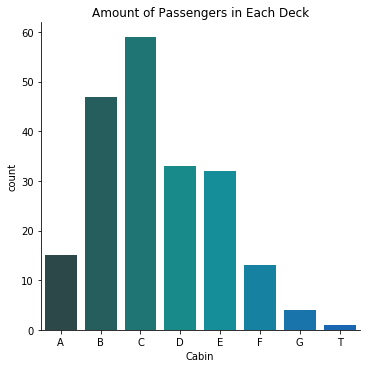

In [20]:
# to get the first letter of the cabin indicating the deck and append it to levels list
levels = []

for level in deck['Cabin']:
    levels.append(level[0])
    
# plot of the levels list
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin, palette = 'winter_d', order = ['A','B','C','D','E','F','G', 'T'], kind = 'count')
plt.title("Amount of Passengers in Each Deck")

- All Decks are divided into Deck A, B, C, D, E, F, G, and T.
- The previous 3 people, who pay GBP530 to board, are most likely board in Deck T.
- For those who pay more than GBP100 are most likely in Deck A, G, and F.

Text(0.5, 1, 'Amount of Passengers in Each Deck Without Deck T')

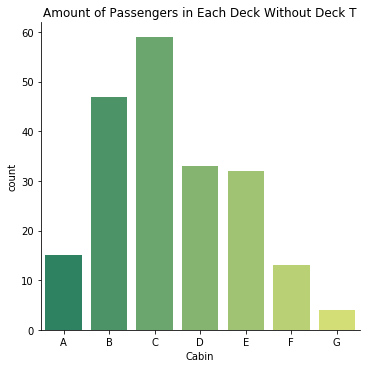

In [21]:
# redefine cabin dataframe and visualize it without deck T
cabin = cabin[cabin.Cabin != 'T']

sns.factorplot('Cabin', data = cabin, palette = 'summer', order = ['A','B','C','D','E','F','G'], kind = 'count')
plt.title("Amount of Passengers in Each Deck Without Deck T")

- Deck T is most likely for passenger class 1 (First Class Suite).
- Deck A, F, G are for passenger class 2 (First Class Berth).
- Deck B, C, D, and E are for passenger class 3 (Second Class Berth).

## Where the Passengers Came from

Text(0.5, 1, 'Cities of Embarkation')

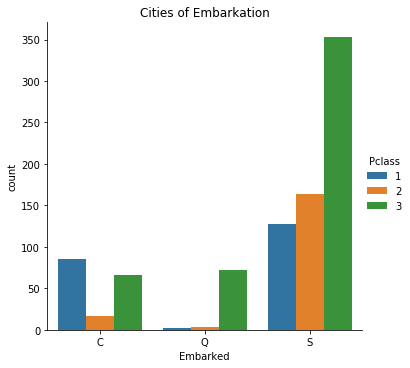

In [22]:
# to know where the passengers come from
sns.factorplot(
    x = 'Embarked',                
    data = titanic,                
    hue = 'Pclass',                
    kind = 'count',   
    order = ['C','Q','S']
)
plt.title("Cities of Embarkation")

- Most of the passengers board from Southampton for all passengers class.
- Those who embark from Queenstown are passengers in passengers class 3.

## Those Who Were Alone and Those with Family

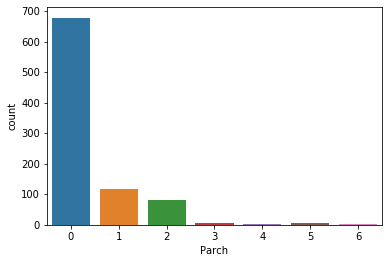

In [23]:
# parents and children onboard
sns.countplot(x = 'Parch', data = titanic)

- A lot of people board without parents nor children.
- The rest mostly travel with either one child/parent or 2 children/parents onboard.

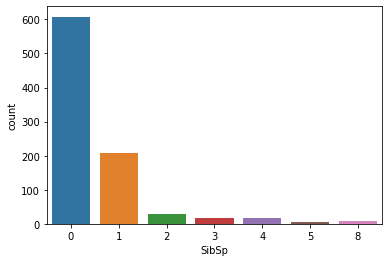

In [24]:
# sibling and spouse count
sns.countplot(x = 'SibSp', data = titanic)

- A lot of people board without siblings nor spouse
- The rest mostly travel with their spouse, a sibling or 2 siblings onboard.

In [25]:
# summing up the sibling and parent-child value
titanic['Alone'] = titanic.SibSp + titanic.Parch
titanic['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [26]:
# create a new column indicating whether the passenger was travelling alone or 
# with family
titanic['Alone'].loc[titanic['Alone'] > 0] = "With Family"
titanic['Alone'].loc[titanic['Alone'] == 0] = "Alone"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Those who travel alone are those who do not travel with their siblings, spouse, parents, nor children. Otherwise, they travel with family.

Text(0.5, 1, 'With Family vs Alone')

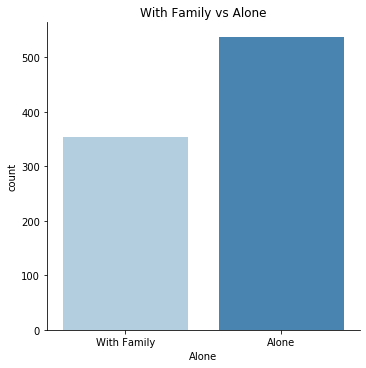

In [27]:
# plot the alone column
sns.factorplot('Alone', data = titanic, palette = "Blues", kind = 'count')
plt.title("With Family vs Alone")

- More than 500 passengers travel alone.
- At most, 350 people travel with family.

## Factors Which Helped Someone Survive the Sinking or Crash of the Titanic

Text(0.5, 1, 'Survivor')

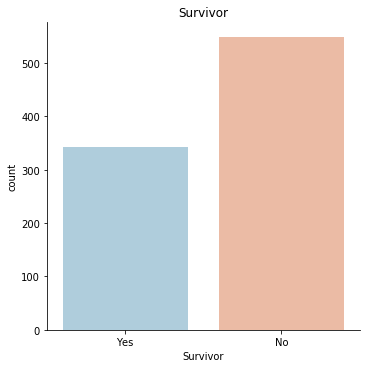

In [28]:
# mapping the survivor
titanic['Survivor'] = titanic.Survived.map(
    {
        0 : 'No',                                          
        1 : "Yes"
    }
)
sns.factorplot(
    x = 'Survivor',               
    data = titanic,               
    palette = 'RdBu_r',                
    order = ['Yes', 'No'], 
    kind = 'count'
)
plt.title("Survivor")

- More than 500 people do not survive that night.
- Less than 40% of the passengers survive the sinking.

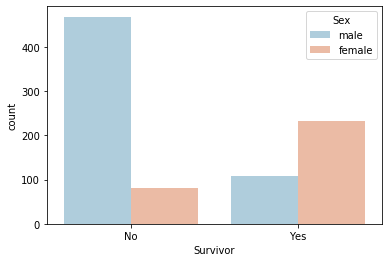

In [29]:
# gender based on survived
sns.countplot(x = 'Survivor', hue = 'Sex', data = titanic, palette = 'RdBu_r')

- More females survive than males.
- Only approximately 100 males survive.
- Less than 100 females do not survive.

Text(0.5, 1, 'Survival Rate Based on Passenger Class and Person Category')

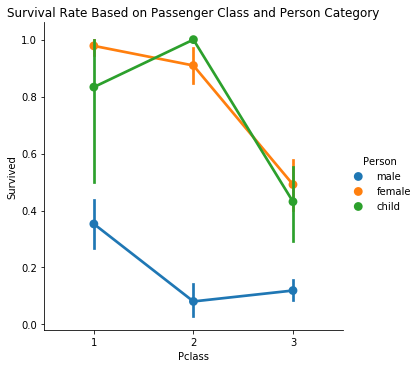

In [30]:
# assessing survivability based on passenger class and person
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic)
plt.title("Survival Rate Based on Passenger Class and Person Category")

- Most of the children and females survive as they are prioritized.
- Highest survival rate lies in passenger class 1.
- 100% children from passenger class 2 survive.
- Average probability to survive for passengers in passenger class 3 is below 50%.
- The lowest survival rate is for males in passenger class 2.

Text(0.5, 1, 'Survival Rate Based on Age')

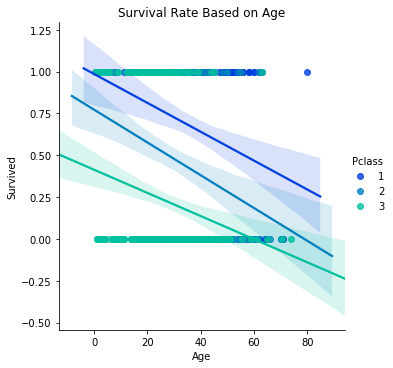

In [31]:
# finding out if age affects survivability
sns.lmplot(
    x = 'Age',      
    y = 'Survived',       
    data = titanic,     
    hue = 'Pclass', 
    palette= 'winter'
)
plt.title("Survival Rate Based on Age")

- The older a passenger is, the less likely he/she survives the sinking.
- The passenger class 1 has more survival rate than the other classes.

Text(0.5, 1, 'Survivability Based on Passengers Class\nSegmented by Generations')

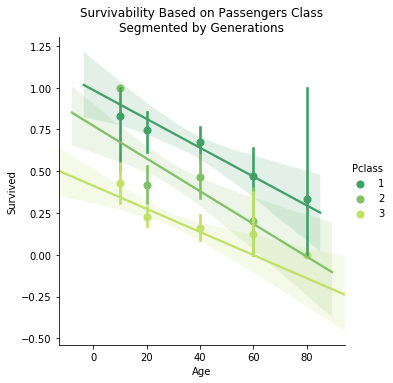

In [32]:
# differentiating gap in x based on generations
generations = [10, 20, 40, 60, 80]

sns.lmplot(
    x = 'Age',           
    y = 'Survived',           
    data = titanic,          
    hue = 'Pclass',           
    palette= 'summer',
    x_bins = generations
)
plt.title("Survivability Based on Passengers Class\nSegmented by Generations")

- Age segmented into generations (10, 20, 40, 60, and 80 years old)
- Children in passenger class 1 has the maximum survival rate of 100%.
- Elderly people (60 to 80 years old) most likely do not survive.

Text(0.5, 1, 'Survivability Based on Sex Segmented by Generations')

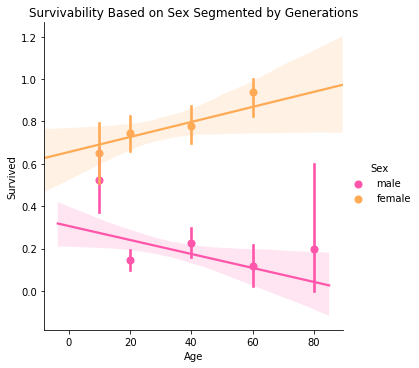

In [33]:
# finding out if age given sex affects survivability
sns.lmplot(
    x = 'Age', 
    y = 'Survived', 
    data = titanic, 
    hue = 'Sex', 
    palette= 'spring',
    x_bins = generations
)
plt.title("Survivability Based on Sex Segmented by Generations")

- Elderly males have slim chance to survive with the exception of the outlier point reaching 60% survival rate.
- Elderly females have highest chance to survive, while female children lowest.
- Boys have less probability to survive than girls.

Linear regression model is not suitable for this data. So, Logistic Regression is used.

In [34]:
# training data
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


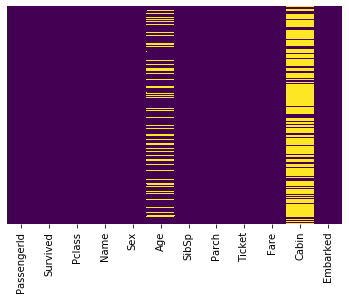

In [35]:
# identifying null value
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

A lot of missing data in age and cabin category.

In [36]:
# imputation for null values 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return train[train['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return train[train['Pclass'] == 2]['Age'].mean()
        else:
            return train[train['Pclass'] == 3]['Age'].mean()
    else:
        return Age
    
# applying the function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

Imputation is performed by replacing null values with the average of the data.

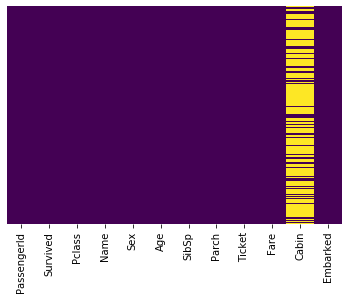

In [37]:
# identifying null value after imputation
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Age category is complete, cabin category needs to be cleaned.

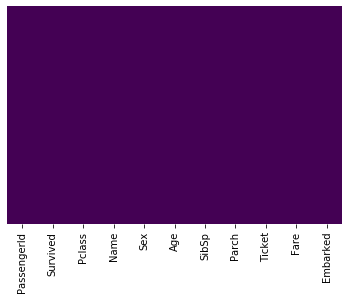

In [38]:
# droping cabin column
train.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Cabin category can be dropped as it does not serve as a good variable for regression.

In [39]:
# getting dummy variables for sex
sex_dummy = pd.get_dummies(train['Sex'], drop_first = True)
sex_dummy.head()

,male
0,1
1,0
2,0
3,0
4,1


- Getting a dummy variable for sex to see the effects of sex in survival rate.
- 1 for male, 0 for female.

In [40]:
# getting dummy variables for embark
embarked_dummy = pd.get_dummies(train['Embarked'], drop_first = True)
embarked_dummy.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


- Getting a dummy variable for embarked to see the effects of embarked in survival rate.
- 0 for C, 1 for Q, 0 for S if the passengers embark from Queenstown.
- 0 for C, 0 for Q, 1 for S if the passengers embark from Southampton. 

In [41]:
# concatenating the dummies into training data and droping some variables
train = pd.concat([train, sex_dummy, embarked_dummy], axis = 1)
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Sex, Embarked, Name, Ticket, and PassengerId are categorical variables that can not be used in performing logistic regression, so they have to be dropped.

In [42]:
# setting x and y
x = train.drop('Survived', axis = 1)
y = train['Survived']

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [43]:
# fitting the model
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

D:\Applications\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# predicting the model
prediction = logreg.predict(x_test)

In [45]:
# stats model
logreg_model = sm.Logit(y, x).fit()
logreg_model.summary()

Optimization terminated successfully.
         Current function value: 0.495546
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 12 Sep 2020   Pseudo R-squ.:                  0.2558
Time:                        23:58:58   Log-Likelihood:                -441.53
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.034e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0336      0.085      0.396      0.692      -0.132       0.200
Age            0.0054      0.006      0.941      0.347      -0.006       0.017
SibSp         -0.2889      0.095     -3.037      0.002      -0.475      -0.102
Parch         -0.1106      0.112     -0.985      0.325      -0.331       0.109
Fare           0.0182      0.003      5.968      0.000       0.012       0.024
male          -2.2728      0.181    -12.559      0.000      -2.627      -1.918
Q              0.2634      0.353      0.745      0.456      -0.429       0.956
S              0.2415      0.220      1.099      0.272      -0.189       0.672
==============================================================================
"""

In [46]:
# average marginal effect computation
average_marg_eff = logreg_model.get_margeff(at = 'overall', method = 'dydx')
print(average_marg_eff.summary())

        Logit Marginal Effects       
Dep. Variable:               Survived
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0054      0.014      0.397      0.692      -0.021       0.032
Age            0.0009      0.001      0.943      0.346      -0.001       0.003
SibSp         -0.0466      0.015     -3.086      0.002      -0.076      -0.017
Parch         -0.0178      0.018     -0.987      0.324      -0.053       0.018
Fare           0.0029      0.000      6.353      0.000       0.002       0.004
male          -0.3662      0.018    -20.180      0.000      -0.402      -0.331
Q              0.0424      0.057      0.746      0.456      -0.069       0.154
S              0.0389      0.035      1.101      0.271      -0.030       0.108


Interpretation:
- Age: one unit increase in age for a passenger, the probability of surviving the sinking is increased by 0.09%
- SibSp: if a passenger travels with 1 more sibling or spouse, the probability of surviving the sinking is reduced by 4.66%
- Parch: if a passenger travels with 1 more parent or child, the probability of surviving the sinking is reduced by 1.78%
- Fare: 1 more unit increase of fare that a passenger pays, the probability of surviving the sinking is increased by 0.29%
- male: if a passenger is a male, the probability of surviving the sinking is reduced by 36.62%
- Q: if a passenger embarks from Queenstown, the probability of surviving the sinking is increased by 4.24%
- S: if a passenger embarks from Southampton, the probability of surviving the sinking is increased by 3.89%

In [47]:
# classification report
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [48]:
# confusion matrix evaluation matrix
logreg_accuracy = metrics.accuracy_score(y_test, prediction)
logreg_precision = metrics.precision_score(y_test, prediction)
logreg_recall = metrics.recall_score(y_test, prediction)

print("The Model's Accuracy = {:.3f}%\nThe Model's Precision = {:.3f}%\nThe Model's Recall = {:.3f}%".format((logreg_accuracy * 100), (logreg_precision * 100), (logreg_recall * 100)))

The Model's Accuracy = 77.239%
The Model's Precision = 77.895%
The Model's Recall = 64.912%


- Accuracy: the model's accuracy when predicting the target (survival rate) is 77.239%.
- Precision: the model will predict correctly the survival rate 77.895% of the time.
- Recall: from the test set, the model can identify correctly 64.912% of the time.

In [49]:
# confusion matrix
conmat = np.array(metrics.confusion_matrix(y_test, prediction))

conlist = []
for i in np.squeeze(conmat):
    conlist.append(i)

matrix = pd.DataFrame(conlist, columns = [['Predicted', 'Predicted'], ['Not Survived', 'Survived']]).transpose()
matrix.columns = [['Actual', 'Actual'], ['Not Survived', 'Survived']]
matrix.transpose()

Predicted         
                    Not Survived Survived
Actual Not Survived          133       21
       Survived               40       74

- There are 207 correct predictions with 133 True Negative and 74 True Positive.
- There are 61 wrong predictions with 21 False Positive and 40 False Negative.

In [50]:
# evaluation metrics
logreg_mae = metrics.mean_absolute_error(y_test, prediction)
logreg_mse = metrics.mean_squared_error(y_test, prediction)
logreg_rmse = np.sqrt(logreg_mse)

print("The Model's Mean Absolute Error = {}\nThe Model's Mean Squared Error = {}\nThe Model's Root Mean Squared Error = {}".format(logreg_mae, logreg_mse, logreg_rmse))

The Model's Mean Absolute Error = 0.22761194029850745
The Model's Mean Squared Error = 0.22761194029850745
The Model's Root Mean Squared Error = 0.47708693159476445
